DATA:

* http://www.worldmrio.com
* 90 countries, 26 sectors.
    
REFS:    

* gg


In [5]:
import pymrio
import numpy as np
import pandas as pd
from backboning.backboning import *
import igraph as ig
import matplotlib.pyplot as plt

# read

In [2]:
eora_storage = "/home/aurelien/local/data/MRIO/eora26"
eora = pymrio.parse_eora26(year=2012, path=eora_storage)
#eora.T, eora.get_regions(), eora.get_sectors()


/home/aurelien/.local/lib/python3.8/site-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


# backboning

Try code by M.Coscia https://www.michelecoscia.com/?page_id=287


In [3]:
n=eora.Z.shape[0]


In [11]:
ix,iy = np.unravel_index(range(n**2), (n,n))
df_disparity  = disparity_filter(pd.DataFrame({'src':ix, 'trg':iy, 'nij':eora.Z.values.flatten()})  , undirected = False, return_self_loops = False)

Calculating DF score...


In [12]:
df_disparity

src   trg           nij     score  variance
1            0     1      24.89600  0.188662  0.000813
2            0     2     400.89000  0.965530  0.000813
3            0     3  226790.00000  1.000000  0.000813
4            0     4    2835.00000  1.000000  0.000813
5            0     5   33202.00000  1.000000  0.000813
...        ...   ...           ...       ...       ...
24147390  4913  4908       0.15346  0.310676  0.000813
24147391  4913  4909       0.12919  0.268898  0.000813
24147392  4913  4910       0.13994  0.287706  0.000813
24147393  4913  4911       1.74180  0.985366  0.000813
24147394  4913  4912       0.70445  0.818786  0.000813

[24142482 rows x 5 columns]

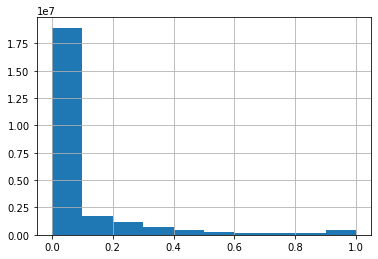

In [13]:
df_disparity['score'].hist()

In [ ]:
filtered_table_nc = noise_corrected( pd.DataFrame({'src':ix, 'trg':iy, 'nij':eora.Z.values.flatten()}) )


Calculating NC score...


In [ ]:
nc_backbone = thresholding(nc_table, threshold_value)

# assorativity

In [21]:
#https://igraph.org/python/doc/tutorial/generation.html#from-pandas-dataframe-s
n=eora.Z.shape[0]
#ix,iy = np.unravel_index(range(n**2), (n,n))
directed = True
#g = ig.Graph.DataFrame(pd.DataFrame({'src':ix, 'trg':iy, 'nij':eora.Z.values.flatten()}), directed=directed) 

#https://igraph.org/python/doc/api/igraph.Graph.html#Adjacency
g=ig.Graph.Weighted_Adjacency(eora.Z.values,mode='directed',attr='weight', loops=False)
print(g.summary())
#
#g.simplify()
g=g.simplify(multiple=True, loops=True, combine_edges=dict(weight="sum"))
print(g.summary())

IGRAPH D-W- 4914 24127744 -- 
+ attr: weight (e)
IGRAPH D-W- 4914 24127744 -- 
+ attr: weight (e)


(array([2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 4.912e+03]),
 array([   0. ,  491.2,  982.4, 1473.6, 1964.8, 2456. , 2947.2, 3438.4,
        3929.6, 4420.8, 4912. ]),
 <a list of 10 Patch objects>)

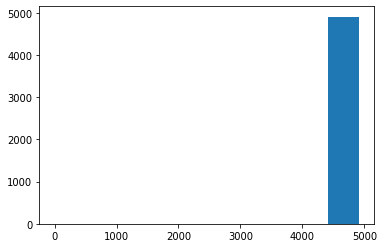

In [28]:
plt.hist(g.indegree())

(array([4.574e+03, 1.430e+02, 5.500e+01, 4.100e+01, 2.500e+01, 1.300e+01,
        1.200e+01, 1.000e+01, 2.000e+00, 6.000e+00, 1.000e+00, 2.000e+00,
        6.000e+00, 3.000e+00, 2.000e+00, 3.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00]),
 array([0.00000000e+00, 3.01173217e+07, 6.02346434e+07, 9.03519651e+07,
        1.20469287e+08, 1.50586608e+08, 1.80703930e+08, 2.10821252e+08,
        2.40938574e+08, 2.71055895e+08, 3.01173217e+08, 3.31290539e+08,
        3.61407860e+08, 3.91525182e+08, 4.21642504e+08, 4.51759825e+08,
        4.81877147e+08, 5.11994469e+08, 5.42111791e+08, 5.72229112e+08,
        6.023464

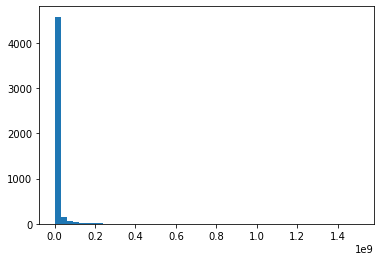

In [27]:
plt.hist( g.strength(mode='in',loops=False,weights="weight"),50)

In [24]:
?g.strength

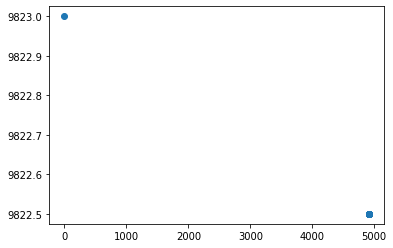

In [12]:
plt.scatter( g.indegree(),g.knn()[0])

compare empirical assortativity with/without filtering/backboning

In [ ]:
n=eora.Z.shape[0]
ix,iy = np.unravel_index(range(n**2), (n,n))
directed = True

for f in [naive, noise_corrected, disparity_filter]:
    #
    filtered_table = f(pd.DataFrame({'src':ix, 'trg':iy, 'nij':eora.Z.values.flatten()}),
              undirected = False, return_self_loops = False)
    for thr in np.arange(0,1,10):
        backbone = thresholding(filtered_table, thr)
        #convert to igraph,nx,..
        cols=['src','trg','nij']
        g = ig.Graph.DataFrame(backbone[cols], directed=directed)
        #compute properties
        #record result

compare null-model assortativity with/without filtering/backboning

# triangles 

compare empirical clustering with/without filtering/backboning

compare null-model clustering with/without filtering/backboning

# communities

sknetworks has [propagation](https://scikit-network.readthedocs.io/en/latest/tutorials/clustering/propagation.html) clustering, that uses **weights**.

# ranking

[graph-tool](https://graph-tool.skewed.de/static/doc/centrality.html?highlight=weighted#graph_tool.centrality.pagerank) has weighted pagerank, as in Cerina et al.15